In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/trainingData" ,
    shuffle=True,
    labels='inferred',
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 602 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['00_healthy', '01_angular_leaf_spot', '02_bean_rust']

In [6]:
len(dataset)

38

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[0 0 1 2 0 2 1 1 2 0 1 2 1 2 1 2]


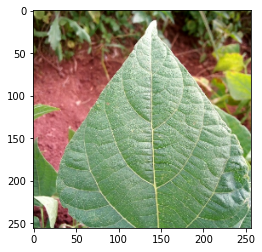

In [8]:
plt.imshow(image_batch[4].numpy().astype("uint8"))

Text(0.5, 1.0, '00_healthy')

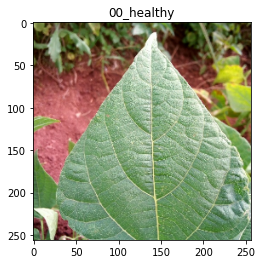

In [9]:
plt.imshow(image_batch[4].numpy().astype("uint8"))
plt.title(class_names[labels_batch[4]])

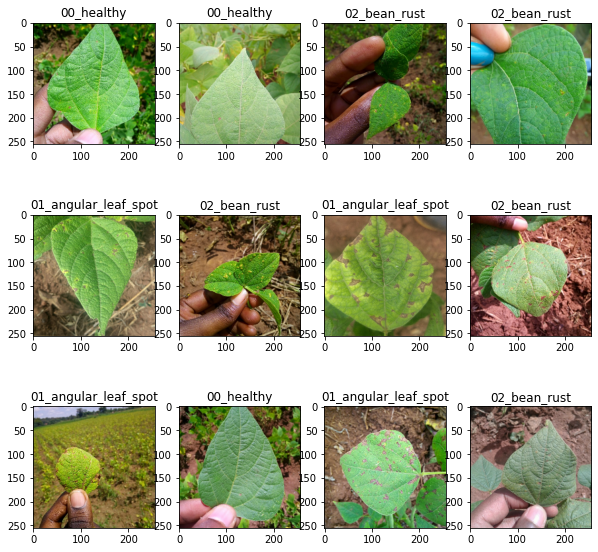

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range (12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])

In [11]:
train_size = 0.9
len(dataset) * train_size

34.2

In [12]:
train_ds = dataset.take(17)
len(train_ds)

17

In [13]:
val_size = 0.1
val_ds = len(dataset)*val_size
val_ds

3.8000000000000003

In [14]:
val_ds=dataset.take(2)
len(val_ds)

2

In [15]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/testData" ,
    shuffle=True,
    labels='inferred',
    label_mode = None,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 693 files belonging to 1 classes.


In [16]:
for image_batch in test_ds:
    print(image_batch.shape)

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(5, 256, 256, 3)


In [17]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])


In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20


17/17 [==============================] - 55s 3s/step - loss: 1.1090 - accuracy: 0.3456 - val_loss: 1.0971 - val_accuracy: 0.3750
Epoch 2/20
17/17 [==============================] - 45s 3s/step - loss: 1.0979 - accuracy: 0.3456 - val_loss: 1.0973 - val_accuracy: 0.3438
Epoch 3/20
17/17 [==============================] - 45s 3s/step - loss: 1.0863 - accuracy: 0.4081 - val_loss: 1.0627 - val_accuracy: 0.5000
Epoch 4/20
17/17 [==============================] - 45s 3s/step - loss: 0.9908 - accuracy: 0.4853 - val_loss: 1.0249 - val_accuracy: 0.4062
Epoch 5/20
17/17 [==============================] - 44s 3s/step - loss: 0.9814 - accuracy: 0.4816 - val_loss: 0.9604 - val_accuracy: 0.4688
Epoch 6/20
17/17 [==============================] - 45s 3s/step - loss: 0.9475 - accuracy: 0.4669 - val_loss: 0.9052 - val_accuracy: 0.5625
Epoch 7/20
17/17 [==============================] - 44s 3s/step - loss: 0.9244 - accuracy: 0.5221 - val_loss: 0.9561 - val_accuracy: 0.5000
Epoch 8/20
17/17 [=============

In [22]:
for image_batch in test_ds.take(1):
    print(image_batch.shape)


(16, 256, 256, 3)


Text(0.5, 1.0, '00_healthy')

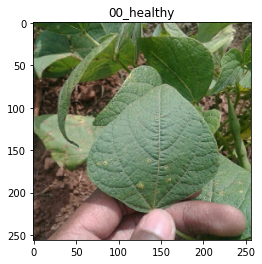

In [23]:
plt.imshow(image_batch[1].numpy().astype("uint8"))
plt.title(class_names[labels_batch[1]])

In [24]:
batch_prediction = model.predict(image_batch)

1/1 [==============================] - 1s 1s/step


In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
1/1 [==============================] - 1s 582ms/step
predicted label: 01_angular_leaf_spot


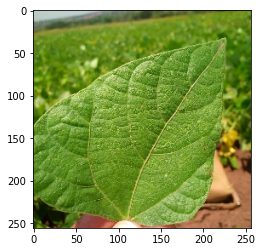

In [26]:
import numpy as np
for image_batch in test_ds.take(1):
    
    first_image = image_batch[1].numpy().astype('uint8')
    
    print("first image to predict")
    plt.imshow(first_image)
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[1])])

1/1 [==============================] - 0s 66ms/step


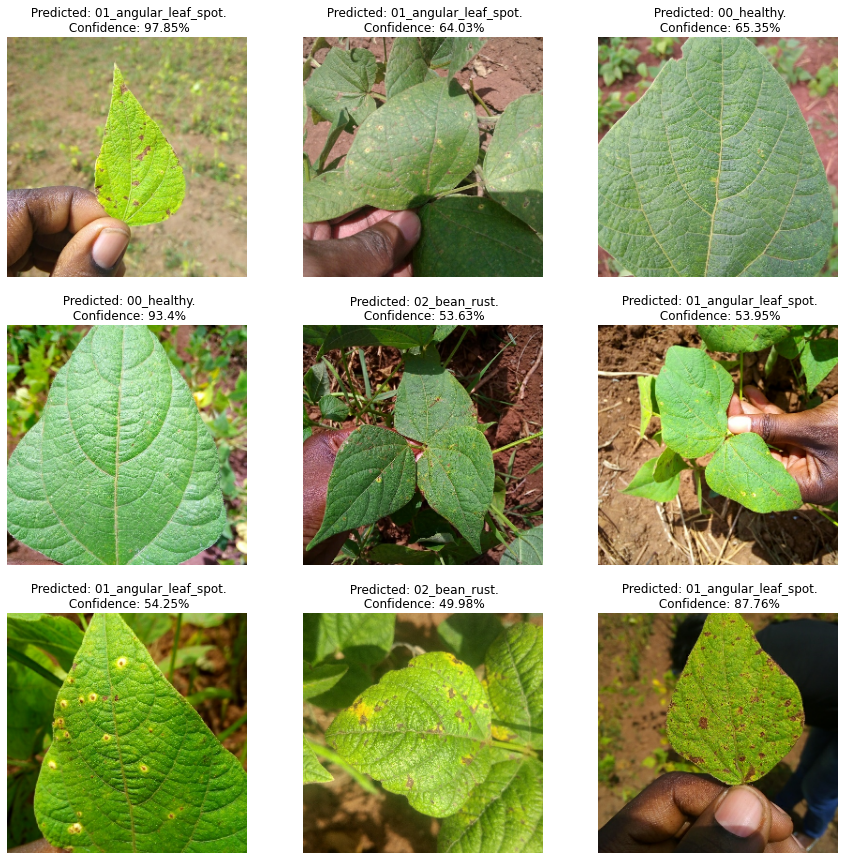

In [27]:
plt.figure(figsize=(15, 15))
for images in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        
        plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 53ms/step


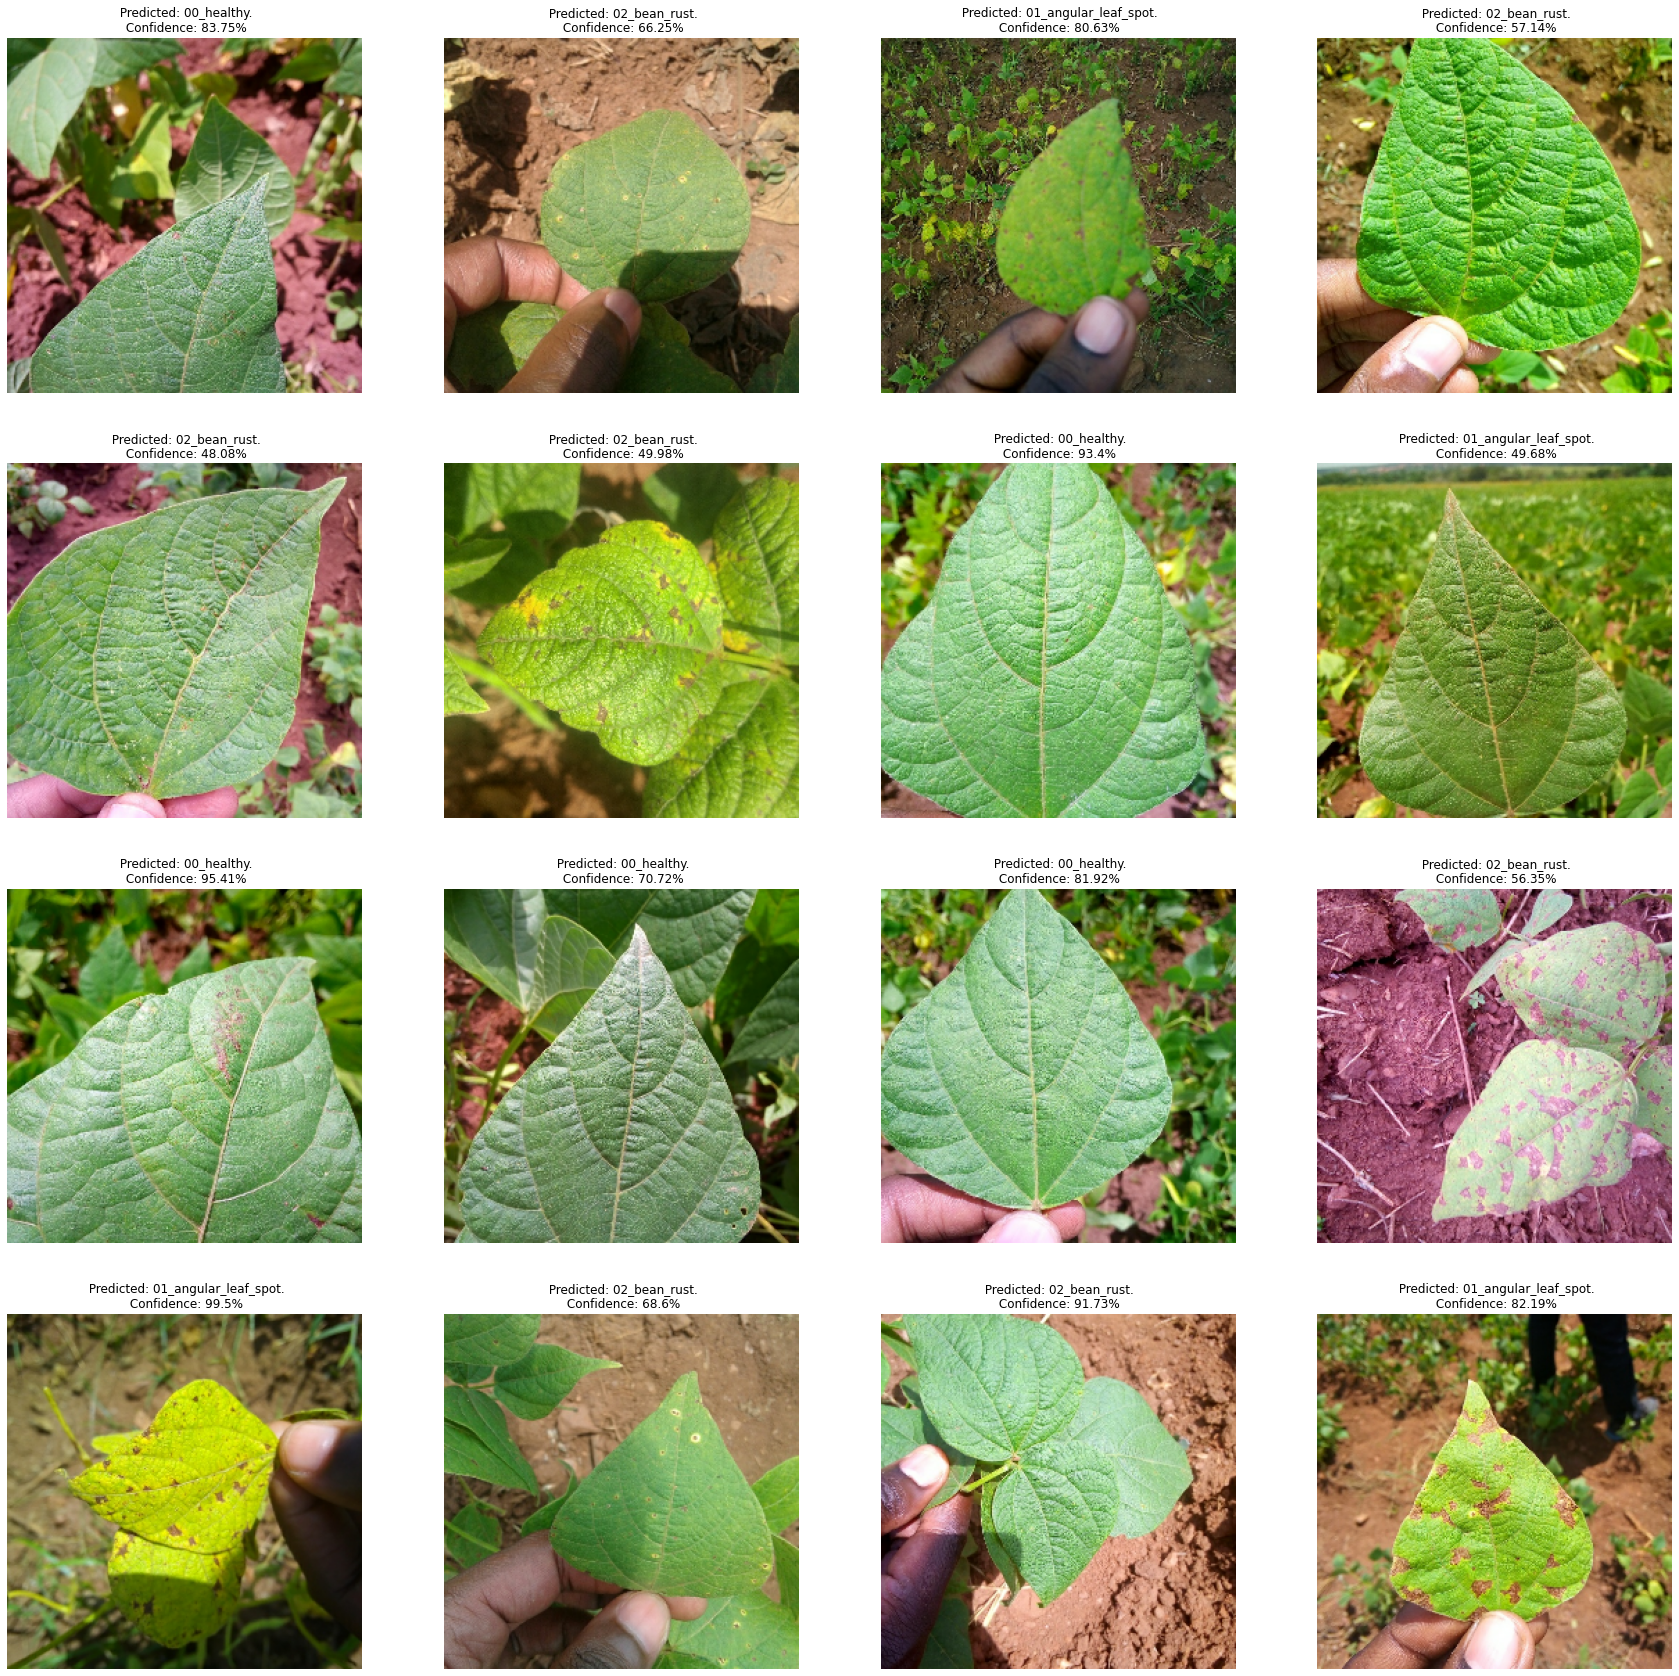

In [28]:
plt.figure(figsize=(30, 30))
for images in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        
        plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [29]:
import os
model.save("CNN.h5")